In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv('../bol_sales.csv')
df.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
0,person_1,female,7065,4.6,30,105,117,1232
1,person_2,female,23028,9.8,23,81,70,1396
2,person_3,female,103377,9.2,11,38,94,1240
3,person_4,female,9815,3.2,16,54,124,720
4,person_5,female,22646,10.1,21,78,119,1379


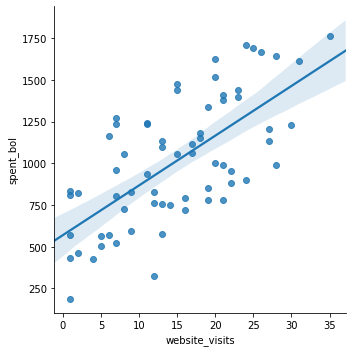

In [24]:
sns.lmplot(x="website_visits", y="spent_bol", fit_reg=True, data=df)

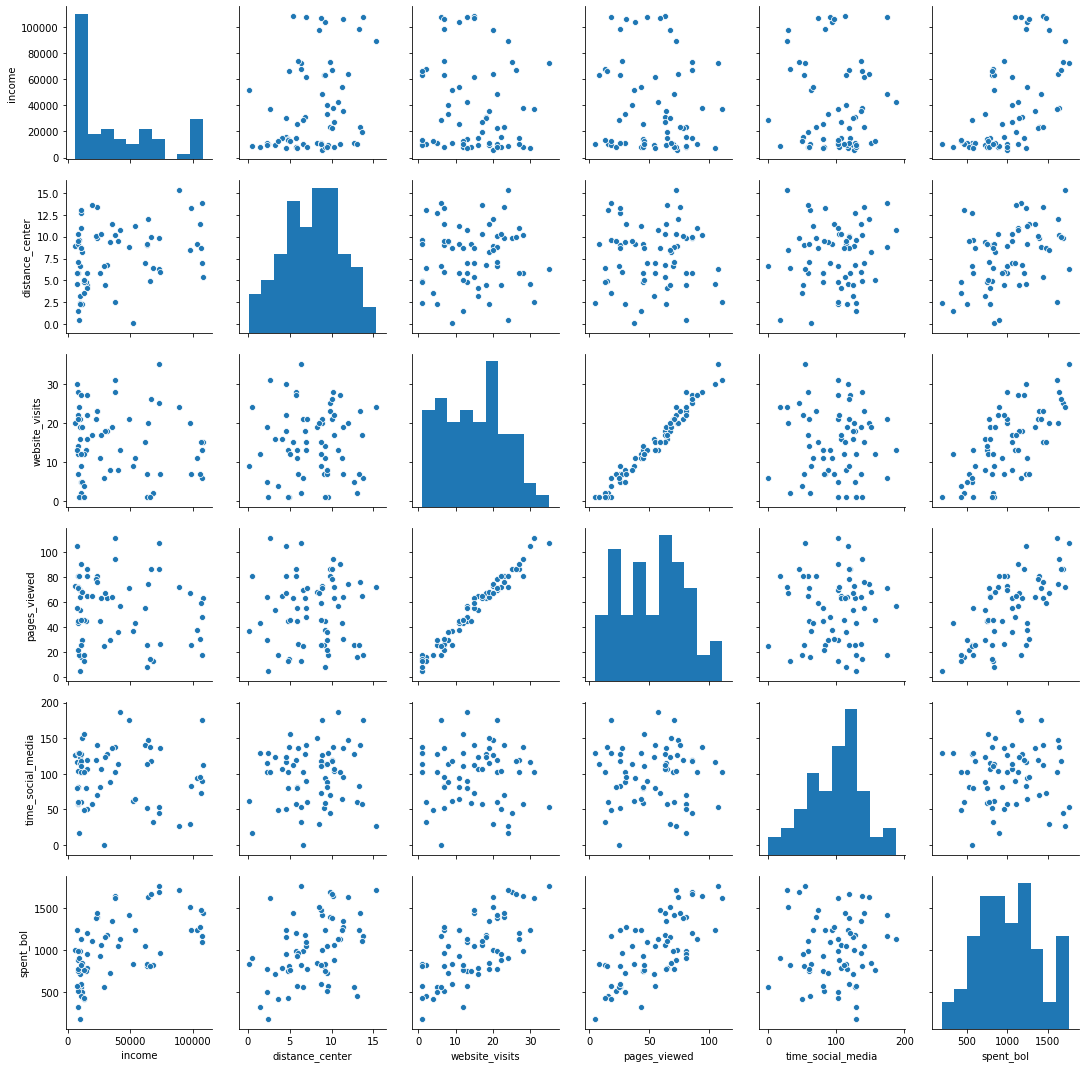

In [25]:
sns.pairplot(df)
plt.show()

In [26]:
import math
df['income_log'] = df['income'].apply(math.log10)
df.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,income_log
0,person_1,female,7065,4.6,30,105,117,1232,3.849112
1,person_2,female,23028,9.8,23,81,70,1396,4.362256
2,person_3,female,103377,9.2,11,38,94,1240,5.014424
3,person_4,female,9815,3.2,16,54,124,720,3.991890
4,person_5,female,22646,10.1,21,78,119,1379,4.354992


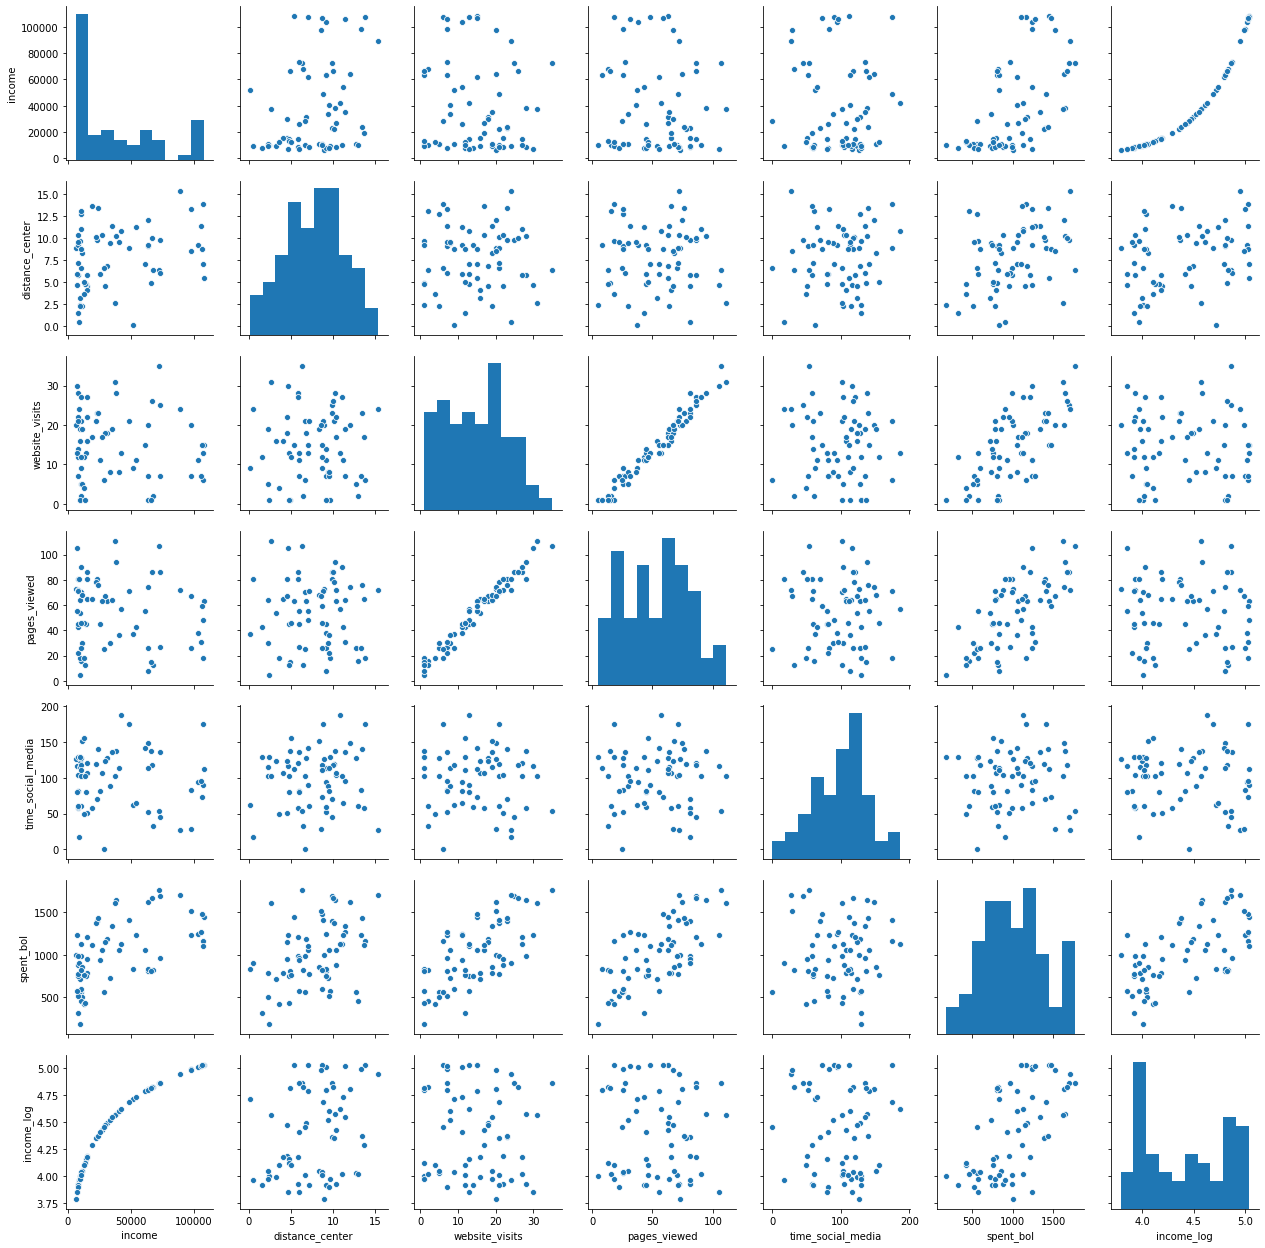

In [27]:
sns.pairplot(df)
plt.show()

In [28]:
y = df['spent_bol'] #We need to take out the price as our Y-variable
X = df[['income_log','distance_center','website_visits']] #this slices the dataframe to include all rows I need
X.index = df['spent_bol'] #this stores the spent_bol in the column names, so we don't lose track of them later
X.head()

,income_log,distance_center,website_visits
spent_bol,,,
1232,3.849112,4.6,30
1396,4.362256,9.8,23
1240,5.014424,9.2,11
720,3.991890,3.2,16
1379,4.354992,10.1,21


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,income_log,distance_center,website_visits
spent_bol,,,
1641,4.580743,10.2,28
936,4.411973,5.9,11
1181,4.494572,6.8,18
728,4.523811,9.4,8
579,3.850646,5.9,13


In [32]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [33]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
520.443958,income_log
25.272299,distance_center
31.245880,website_visits


In [34]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.9165190071116581

The  $𝑅^2$  is 0.917, which means almost 92% of the variation in euros spent on Bol.com is explained by the model.

In [35]:
math.sqrt(mean_squared_error(y_test, y_test_p))

88.31684555092063

the RMSE is 88 which means we are typically 88 euro's spent on Bol.com off

In [39]:
df['spent_bol_p'] = lm.predict(X) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,income_log,spent_bol_p
0,person_1,female,7065,4.6,30,105,117,1232,3.849112,1112.106735
1,person_2,female,23028,9.8,23,81,70,1396,4.362256,1291.864253
2,person_3,female,103377,9.2,11,38,94,1240,5.014424,1241.167058
3,person_4,female,9815,3.2,16,54,124,720,3.991890,713.591220
4,person_5,female,22646,10.1,21,78,119,1379,4.354992,1233.173305
5,person_6,female,6142,8.9,20,73,126,1000,3.788310,876.674604
6,person_7,female,63833,12.0,20,74,148,1625,4.805045,1484.172549
7,person_8,female,10139,6.6,21,70,102,991,4.005995,963.087202
8,person_9,female,8452,5.8,28,81,58,990,3.926959,1120.456902
9,person_10,male,15367,4.5,22,81,51,954,4.186589,1035.250294


In [47]:
df2 = pd.read_csv('../bol_sales_holdout_new.csv')


df2['income_log'] = df2['income'].apply(math.log10)
X = df2[['income_log','distance_center','website_visits']] #this slices the dataframe to include all rows I need
X.head()

df2['spent_bol_p'] = lm.predict(X) #use built-in predict() method to generate predictions; store in original dataframe
df2.head(10)

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,income_log,spent_bol_p
0,person_67,male,10813,4.8,10,41,107,470,4.033946,588.439358
1,person_68,male,56724,13.2,12,52,0,1219,4.753767,1237.844732
2,person_69,male,11476,9.0,2,16,120,360,4.059791,458.066504
3,person_70,male,37781,11.4,15,56,134,1091,4.577273,1194.237310
4,person_71,male,26179,9.4,14,50,92,879,4.417953,1029.529496
5,person_72,female,96452,2.9,17,52,87,1157,4.984311,1253.754888
6,person_73,female,9952,3.2,3,20,118,400,3.997910,310.527889
7,person_74,female,7857,6.0,11,37,109,573,3.895257,577.831910
8,person_75,male,11600,4.2,14,49,69,538,4.064458,714.139172
9,person_76,female,46561,7.0,15,56,64,1206,4.668022,1130.268887


In [48]:
r2_score(df2['spent_bol'],df2['spent_bol_p'])

0.8520834795735599

My $R^2$ is 85% which means 85% of the variance can be explained by the model 

In [50]:
math.sqrt(mean_squared_error(df2['spent_bol'],df2['spent_bol_p']))

125.3809030137784

$RMSE$ is 125 which means my model is typically 125 euro's off in the holdout set